**🔑 Objective Recap**

We need to:

1. Analyze monthly natural gas prices (Oct 2020 – Sep 2024)

2. Understand seasonality

3. Estimate price for any past date

4. Extrapolate prices 1 year into the future

5. Build a function:

### Step 1: Load & Understand the Data
- Assumptions about Nat_Gas.csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [9]:
# ----------------------------------
# 1. Load Data
# ----------------------------------
df = pd.read_csv("Nat_Gas.csv")

In [11]:
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [13]:
# Convert date column
df['Dates'] = pd.to_datetime(df['Dates'], format="%m/%d/%y")
df = df.sort_values('Dates')
df.set_index('Dates', inplace=True)

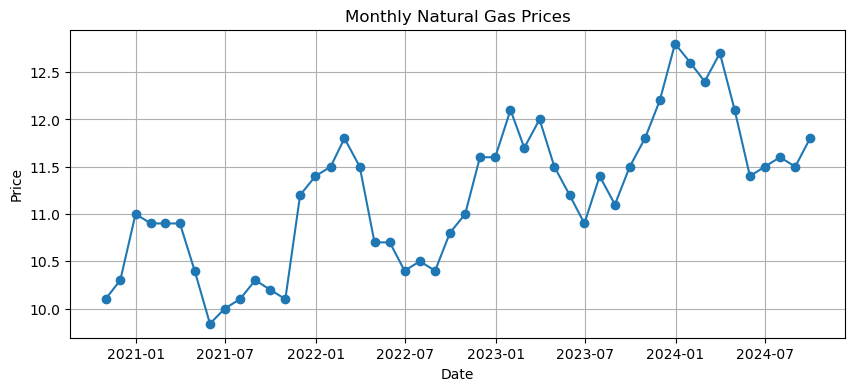

In [15]:
# ------------------------------------
# 2. Visualize Monthly Prices
# ------------------------------------
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Prices'], marker='o')
plt.title("Monthly Natural Gas Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

In [17]:
# ------------------------------------
# 3. Interpolate to Daily Prices
# ------------------------------------
daily_df = df.resample('D').interpolate(method='time')

In [19]:
# ------------------------------------
# 4. Add Seasonal Features
# ------------------------------------
daily_df['month'] = daily_df.index.month
daily_df['sin_month'] = np.sin(2 * np.pi * daily_df['month'] / 12)
daily_df['cos_month'] = np.cos(2 * np.pi * daily_df['month'] / 12)


In [21]:
# ------------------------------------
# 5. Train Seasonal Regression Model
# ------------------------------------
X = daily_df[['sin_month', 'cos_month']]
y = daily_df['Prices']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
# ------------------------------------
# 6. Extrapolate 1 Year Forward
# ------------------------------------
last_date = daily_df.index.max()

future_dates = pd.date_range(
    start=last_date + timedelta(days=1),
    end=last_date + timedelta(days=365),
    freq='D'
)

future_df = pd.DataFrame(index=future_dates)
future_df['month'] = future_df.index.month
future_df['sin_month'] = np.sin(2 * np.pi * future_df['month'] / 12)
future_df['cos_month'] = np.cos(2 * np.pi * future_df['month'] / 12)

future_df['Prices'] = model.predict(
    future_df[['sin_month', 'cos_month']]
)

In [25]:
# ------------------------------------
# 7. Combine Historical + Forecast
# ------------------------------------
price_curve = pd.concat([
    daily_df[['Prices']],
    future_df[['Prices']]
])

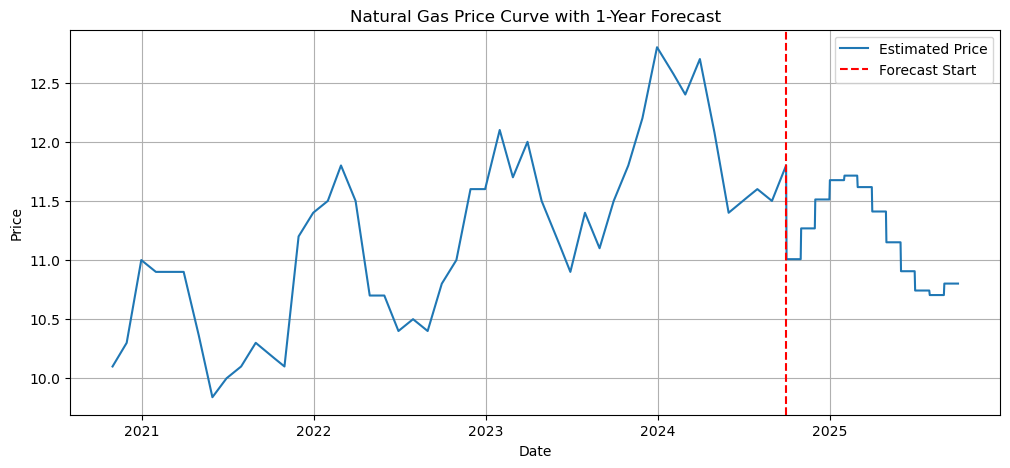

In [27]:
# ------------------------------------
# 8. Visualization with Forecast
# ------------------------------------
plt.figure(figsize=(12,5))
plt.plot(price_curve.index, price_curve['Prices'], label="Estimated Price")
plt.axvline(last_date, color='red', linestyle='--', label="Forecast Start")
plt.title("Natural Gas Price Curve with 1-Year Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

In [29]:
# ------------------------------------
# 9. Pricing Function (REQUIRED OUTPUT)
# ------------------------------------
def estimate_price(input_date):
    """
    Returns estimated natural gas price for any date
    """
    input_date = pd.to_datetime(input_date)

    if input_date in price_curve.index:
        return float(price_curve.loc[input_date, 'Prices'])

    month = input_date.month
    sin_m = np.sin(2 * np.pi * month / 12)
    cos_m = np.cos(2 * np.pi * month / 12)

    return float(model.predict([[sin_m, cos_m]])[0])

In [31]:
# ------------------------------------
# 10. Example Checks
# ------------------------------------
print("Price on 2021-02-15:", estimate_price("2021-02-15"))
print("Price on 2025-06-01:", estimate_price("2025-06-01"))

Price on 2021-02-15: 10.9
Price on 2025-06-01: 10.9056469409267


“Monthly natural gas prices were interpolated to estimate prices on arbitrary dates. A seasonal regression model using sinusoidal monthly features was fitted to capture cyclical price behavior. This model was then used to extrapolate prices one year beyond the available data. The final output is a function that returns an estimated gas price for any input date.”